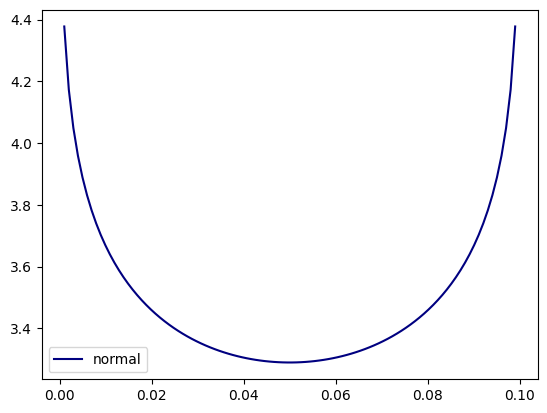

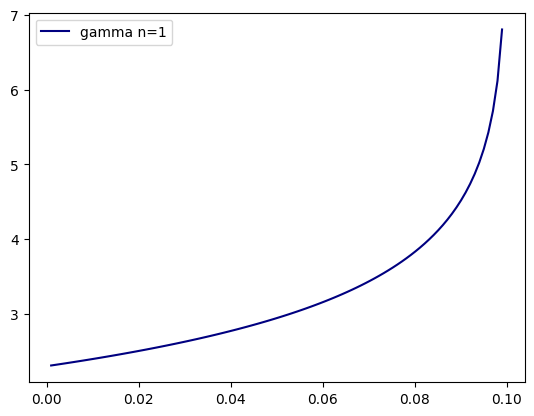

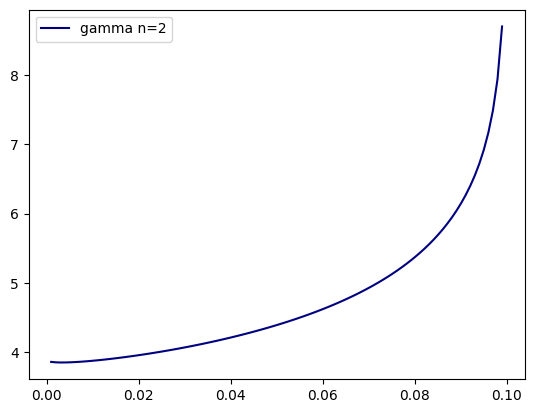

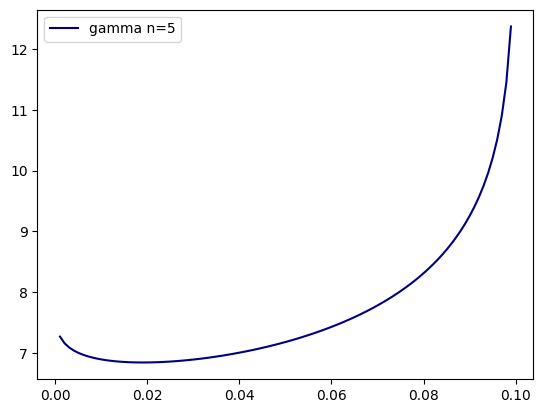

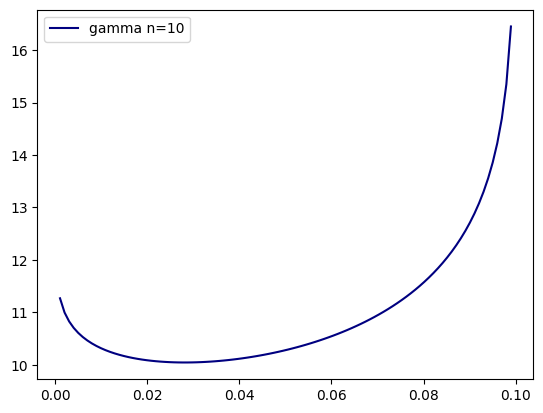

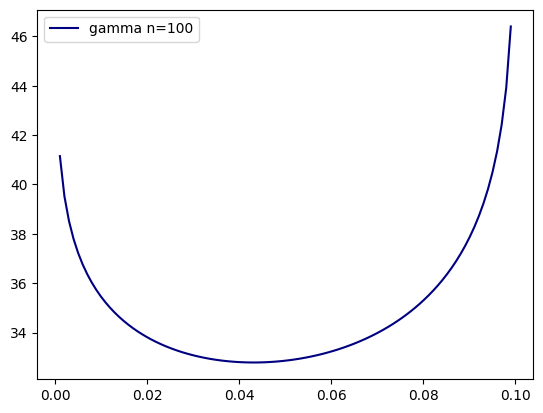

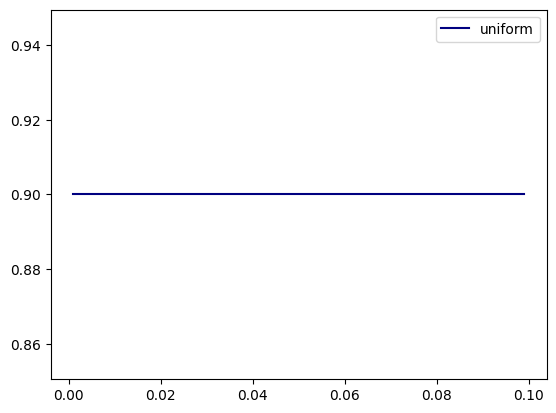

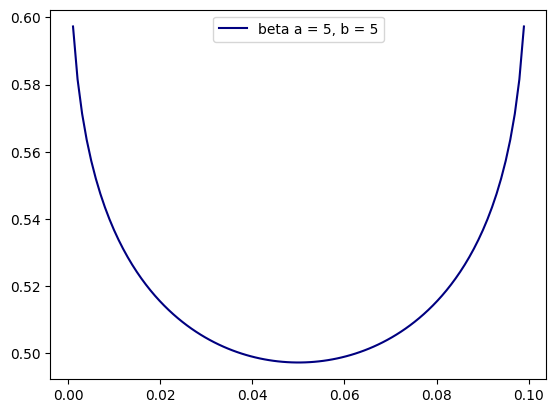

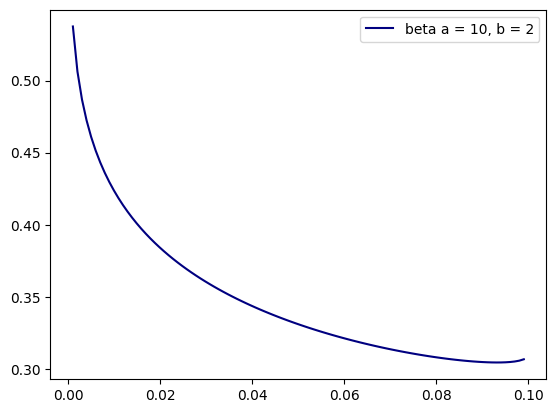

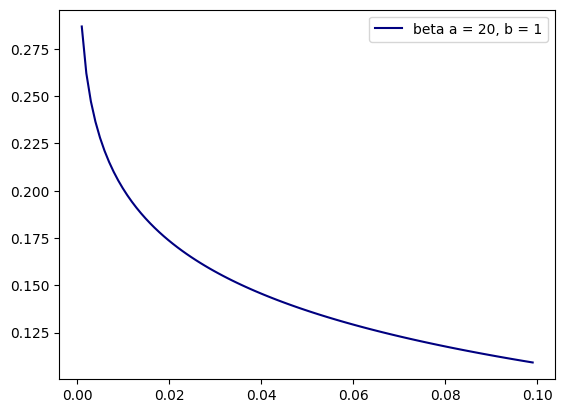

In [ ]:
#Задача 1
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def N(q):
  Q=stats.norm.ppf(q, loc=0, scale=1)
  return Q

def G(q, n):
  Q=stats.gamma.ppf(q, a=n, scale=1)
  return Q

def R(q):
  Q=stats.uniform.ppf(q, loc=0, scale=1)
  return Q

def B(q, a, b):
  Q=stats.beta.ppf(q, a=a, b=b)
  return Q

a=0.1

b=np.linspace(0.001, a-0.001, 100)

plt.plot(b, N(1-a+b)-N(b), label='normal', color='navy')
plt.legend()
plt.show()


for i in [1, 2, 5, 10, 100]:
  plt.plot(b, G((1-a+b), i)-G(b, i), label=f'gamma n={i}', color='navy')
  plt.legend()
  plt.show()

plt.plot(b, R(1-a+b)-R(b), label='uniform', color='navy')
plt.legend()
plt.show()

plt.plot(b, B(1-a+b, 5, 5)-B(b, 5, 5), label=f'beta a = {5}, b = {5}', color='navy')
plt.legend()
plt.show()

plt.plot(b, B(1-a+b, 10, 2)-B(b, 10, 2), label=f'beta a = {10}, b = {2}', color='navy')
plt.legend()
plt.show()

plt.plot(b, B(1-a+b, 20, 1)-B(b, 20, 1), label=f'beta a = {20}, b = {1}', color='navy')
plt.legend()
plt.show()

In [ ]:
#Задача 2
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random


for n in [20, 50, 100]:
  D=[]
  M=[]
  k=0
  for i in range (1000):
    a=random.uniform(0, 2)
    X=stats.uniform.rvs(loc=0, scale=a, size=n)

    aa=0.1

    S=np.mean(X)

    l=2*S*(1-(1/np.sqrt(3))*stats.norm.ppf((1-aa/2), loc=0, scale=1)*1/(np.sqrt(n)))
    r=2*S*(1-(1/np.sqrt(3))*stats.norm.ppf(aa/2, loc=0, scale=1)*1/(np.sqrt(n)))

    if (a<r)&(a>l):
      k+=1

    D.append(math.fabs(l-r))

    X.sort()

    M.append(math.fabs(X[n-1] - X[n-1]*aa**((-1)*1/n)))


  print(f'вероятность попадания для n = {n}: {k/1000}')

  d=np.mean(D)
  m=np.mean(M)

  if (m<d):
    print(f'точный меньше асимтотического для n = {n}')
  else:
    print(f'точный не меньше асимтотического для n = {n}')

  print(d, m)






вероятность попадания для n = 20: 0.898
точный меньше асимтотического для n = 20
0.4158287664765018 0.11340109405269351
вероятность попадания для n = 50: 0.898
точный меньше асимтотического для n = 50
0.27323815629695186 0.04714035561438435
вероятность попадания для n = 100: 0.901
точный меньше асимтотического для n = 100
0.18449441381803958 0.02235115635849258


In [ ]:
#Задача 3
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random

for a in [0.1, 0.4, 0.5, 0.9]:
  for n in [20, 50, 100]:
    D1=[]
    D2=[]
    for i in range (1000):
      X=stats.bernoulli.rvs(p=a, size=n)

      aa=0.1

      S=np.mean(X)

      l=S-stats.norm.ppf(1-aa/2, loc=0, scale=1)*(np.sqrt(S*(1-S)))/np.sqrt(n)
      r=S-stats.norm.ppf(aa/2, loc=0, scale=1)*(np.sqrt(S*(1-S)))/np.sqrt(n)

      ll=(np.sin(np.arcsin(np.sqrt(S)) - stats.norm.ppf(1-aa/2, loc=0, scale=1)/(2*np.sqrt(n))))**2
      rr=(np.sin(np.arcsin(np.sqrt(S)) - stats.norm.ppf(aa/2, loc=0, scale=1)/(2*np.sqrt(n))))**2

      D1.append(math.fabs(l-r))
      D2.append(math.fabs(ll-rr))

    d1=np.mean(D1)
    d2=np.mean(D2)

    print(f'первый способ θ={a}, n={n}: {d1}')
    print(f'второй способ θ={a}, n={n}: {d2}')

первый способ θ=0.1, n=20: 0.1939274391288474
второй способ θ=0.1, n=20: 0.18958459190253563
первый способ θ=0.1, n=50: 0.1359640842277155
второй способ θ=0.1, n=50: 0.13474120833785258
первый способ θ=0.1, n=100: 0.09697312516349978
второй способ θ=0.1, n=100: 0.09653644130917464
первый способ θ=0.4, n=20: 0.350001766628699
второй способ θ=0.4, n=20: 0.34216376181496155
первый способ θ=0.4, n=50: 0.2256438982037753
второй способ θ=0.4, n=50: 0.2236144322284378
первый способ θ=0.4, n=100: 0.16041822485611182
второй способ θ=0.4, n=100: 0.15969583864224013
первый способ θ=0.5, n=20: 0.35897466142092715
второй способ θ=0.5, n=20: 0.3509357159283695
первый способ θ=0.5, n=50: 0.2302897713316118
второй способ θ=0.5, n=50: 0.22821851986367406
первый способ θ=0.5, n=100: 0.16361021319269303
второй способ θ=0.5, n=100: 0.16287345299873743
первый способ θ=0.9, n=20: 0.20006031488686904
второй способ θ=0.9, n=20: 0.1955801268974621
первый способ θ=0.9, n=50: 0.13610750031077237
второй способ θ=